In [1]:
import pandas as pd
import numpy as np
import lib.covid as covid
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Fips codes

Missoula, MT: 30063

Gallatin, MT: 30031

Collier, FL: 12021

In [7]:
data_missoula = covid.CovidTrends(county=30063).get_covid_data()
data_gallatin = covid.CovidTrends(county=30031).get_covid_data()
data = pd.merge(data_missoula, data_gallatin['Gallatin'], how='inner', left_index=True, right_index=True)
data = data.dropna()
diff = data.diff().dropna()


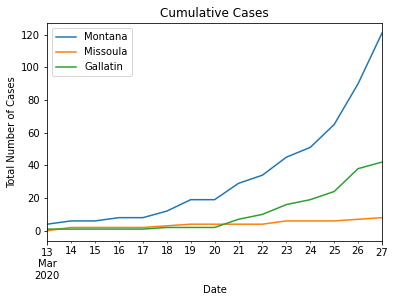

In [8]:
data.plot()
plt.title('Cumulative Cases')
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.show()

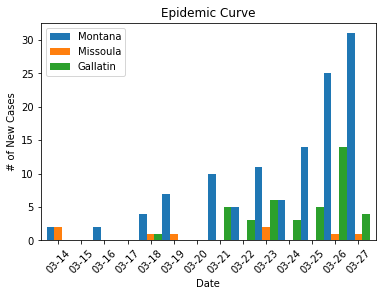

In [9]:
ax = diff.plot.bar(rot=45, width=1)
ax.set_xticklabels(diff.index.strftime('%m-%d'))
plt.title('Epidemic Curve')
plt.xlabel('Date')
plt.ylabel('# of New Cases')
plt.show()


In [10]:
# TODO: do not drop data with NAs
# TODO: better plotting library